In [1042]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plots
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from statsmodels.discrete.discrete_model import MNLogit

In [1043]:
#We import our data and we get started

# Data Import

In [1044]:
Our_data = pd.read_csv("C:/Users/Hp/Downloads/PrimaryData_Group13/Survey.csv")
Our_data

,Timestamp,Name,Age,Gender,Year of study,School you are enrolled in,What is your major?,Do you like Batman?,"On average, how many hours per day do you spend studying?",How many assignments/projects do you have on average each week?,How many societies are you currently a part of,how many hours per week do you dedicate to these societies?,مجھ سے بولے من میرا، سب کو سب نہیں ملتا,How many hours per week do you spend socializing/hanging out with friends?,How many hours per week do you typically spend on sports activities?,"On average, how many hours of sleep do you get per night?","On a scale from 1 to 10, how would you rate your stress level related to your academic workload?",Have you sought counseling or mental health support services on campus?
0,21/10/2023 00:34:22,Javeria,21,Female,Senior,Business School (SDSB),Management Sciences,No (I'm lame),1-2,1-2,none,none,Jo baat,8-10,none,7-9,5,No
1,21/10/2023 02:13:47,Mehdi Changazi,21,Male,Junior,School of Science (SSE),Computer Science,No (I'm lame),3-4,3-5,None,None,Nahhh,5-7,11-13,7-9,2,No
2,21/10/2023 02:15:26,M. Usman. A,22,Male,Junior,School of Science (SSE),Computer Science,Yes (I'm Vengeance),4-5,6-7,None,None,Jo baat,8-10,5-7,4-6,9,No
3,21/10/2023 02:23:02,Mushtaq,21,Male,Senior,Business School (SDSB),Acf,Yes (I'm Vengeance),1-2,1-2,None,None,Jo baat,5-7,2-4,4-6,6,Yes
4,21/10/2023 09:18:13,Mustafa Hussain,19,Male,Sophomore,School of Science (SSE),Computer Science,Yes (I'm Vengeance),3-4,3-5,None,None,Jo baat,2-4,2-4,4-6,6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,22/10/2023 22:13:35,Abdullah Mushtaq,19,Male,Freshman,School of Science (SSE),Computer Science,NaN,3-4,1-2,1,2-4,Nahhh,5-7,5-7,7-9,6,No
116,22/10/2023 22:28:03,Aiman Mubasher,22,Female,Junior,School of Science (SSE),CS,Yes (I'm Vengeance),10-14,3-5,None,None,Jo baat,2-4,None,2-3,10,No
117,22/10/2023 22:29:38,Eesha Ahsen,20,Female,Senior,School of Science (SSE),Computer Science,Yes (I'm Vengeance),4-5,3-5,None,None,Jo baat,5-7,None,7-9,9,Maybe (my friends)
118,22/10/2023 22:37:49,Bukhtawar Hussain,20,Female,Sophomore,Law School (SAHSOL),Law,No (I'm lame),3-4,1-2,2,12-14,Jo baat,11-15,2-4,4-6,6,No


In [1045]:
print(Our_data.shape)

(120, 18)


# DATA CLEANING

In [1046]:
#We first drop out the irrelevant Columns, so that we can make more sense

In [1047]:
Our_data = Our_data.drop('Do you like Batman?', axis=1)

Our_data = Our_data.drop('مجھ سے بولے من میرا، سب کو سب نہیں ملتا', axis=1)

Our_data = Our_data.drop('Timestamp', axis=1)

Our_data

,Name,Age,Gender,Year of study,School you are enrolled in,What is your major?,"On average, how many hours per day do you spend studying?",How many assignments/projects do you have on average each week?,How many societies are you currently a part of,how many hours per week do you dedicate to these societies?,How many hours per week do you spend socializing/hanging out with friends?,How many hours per week do you typically spend on sports activities?,"On average, how many hours of sleep do you get per night?","On a scale from 1 to 10, how would you rate your stress level related to your academic workload?",Have you sought counseling or mental health support services on campus?
0,Javeria,21,Female,Senior,Business School (SDSB),Management Sciences,1-2,1-2,none,none,8-10,none,7-9,5,No
1,Mehdi Changazi,21,Male,Junior,School of Science (SSE),Computer Science,3-4,3-5,None,None,5-7,11-13,7-9,2,No
2,M. Usman. A,22,Male,Junior,School of Science (SSE),Computer Science,4-5,6-7,None,None,8-10,5-7,4-6,9,No
3,Mushtaq,21,Male,Senior,Business School (SDSB),Acf,1-2,1-2,None,None,5-7,2-4,4-6,6,Yes
4,Mustafa Hussain,19,Male,Sophomore,School of Science (SSE),Computer Science,3-4,3-5,None,None,2-4,2-4,4-6,6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Abdullah Mushtaq,19,Male,Freshman,School of Science (SSE),Computer Science,3-4,1-2,1,2-4,5-7,5-7,7-9,6,No
116,Aiman Mubasher,22,Female,Junior,School of Science (SSE),CS,10-14,3-5,None,None,2-4,None,2-3,10,No
117,Eesha Ahsen,20,Female,Senior,School of Science (SSE),Computer Science,4-5,3-5,None,None,5-7,None,7-9,9,Maybe (my friends)
118,Bukhtawar Hussain,20,Female,Sophomore,Law School (SAHSOL),Law,3-4,1-2,2,12-14,11-15,2-4,4-6,6,No


In [1048]:
print(Our_data.shape)

(120, 15)


In [1049]:
# Next we make the column names more Readible

In [1050]:
column_mapping = {
    'Year of study': 'Year',
    'School you are enrolled in': 'School',
    ' What is your major?': 'Major',
    'On average, how many hours per day do you spend studying?': 'Hours/day study',
    'How many assignments/projects do you have on average each week?': 'Assignments/Week',
    'How many societies are you currently a part of': 'Current societies',
    'how many hours per week do you dedicate to these societies?': 'Time/week for societies',
    'How many hours per week do you spend socializing/hanging out with friends?': 'Hours/week socializing',
    'How many hours per week do you typically spend on sports activities?': 'Hours/week sports',
    'On average, how many hours of sleep do you get per night?': 'Sleep/night',
    'Have you sought counseling or mental health support services on campus?': 'Counseling on campus',
    'On a scale from 1 to 10, how would you rate your stress level related to your academic workload?': 'Stress level from workload (1-10)'   
}

Our_data.rename(columns=column_mapping, inplace=True)

In [1051]:
Our_data

,Name,Age,Gender,Year,School,Major,Hours/day study,Assignments/Week,Current societies,Time/week for societies,Hours/week socializing,Hours/week sports,Sleep/night,Stress level from workload (1-10),Counseling on campus
0,Javeria,21,Female,Senior,Business School (SDSB),Management Sciences,1-2,1-2,none,none,8-10,none,7-9,5,No
1,Mehdi Changazi,21,Male,Junior,School of Science (SSE),Computer Science,3-4,3-5,None,None,5-7,11-13,7-9,2,No
2,M. Usman. A,22,Male,Junior,School of Science (SSE),Computer Science,4-5,6-7,None,None,8-10,5-7,4-6,9,No
3,Mushtaq,21,Male,Senior,Business School (SDSB),Acf,1-2,1-2,None,None,5-7,2-4,4-6,6,Yes
4,Mustafa Hussain,19,Male,Sophomore,School of Science (SSE),Computer Science,3-4,3-5,None,None,2-4,2-4,4-6,6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Abdullah Mushtaq,19,Male,Freshman,School of Science (SSE),Computer Science,3-4,1-2,1,2-4,5-7,5-7,7-9,6,No
116,Aiman Mubasher,22,Female,Junior,School of Science (SSE),CS,10-14,3-5,None,None,2-4,None,2-3,10,No
117,Eesha Ahsen,20,Female,Senior,School of Science (SSE),Computer Science,4-5,3-5,None,None,5-7,None,7-9,9,Maybe (my friends)
118,Bukhtawar Hussain,20,Female,Sophomore,Law School (SAHSOL),Law,3-4,1-2,2,12-14,11-15,2-4,4-6,6,No


In [1052]:
# The next important thing is to see whether if there are any Null Values, which could really bother our EDA
# alot of the data is in String DataType

In [1053]:
Our_data.isnull().sum()

Name                                 0
Age                                  0
Gender                               0
Year                                 0
School                               0
Major                                0
Hours/day study                      0
Assignments/Week                     0
Current societies                    0
Time/week for societies              0
Hours/week socializing               0
Hours/week sports                    0
Sleep/night                          0
Stress level from workload (1-10)    0
Counseling on campus                 0
dtype: int64

In [1054]:
#No Null Values, was just making sure so that we dont have problems with our data later

In [1055]:
# A problem with the Majors was alot of the majors were same but typed differently, So we gathered all the majors to make
# visualizations better for major related queries

In [1056]:
major_mapping = {
    'CS': 'Computer Science',
    'CS ': 'Computer Science',
    'Computer science': 'Computer Science',
    'Computer science ': 'Computer Science',
    'Computer Science ': 'Computer Science',
    'cs': 'Computer Science',
    'Cs': 'Computer Science',
    'computer science': 'Computer Science',
    'computer science ': 'Computer Science',
    'CS IA': 'Computer Science',
    
    
    'mgs': 'Management Sciences',
    'MGS': 'Management Sciences',
    'Mgs': 'Management Sciences',
    'Management science': 'Management Sciences',
    'Management Science ': 'Management Sciences',
    'Management Sciences':'Management Sciences',
    'Management Sciences ':'Management Sciences',
    'MGS (Intended)':'Management Sciences',
    'Intended: MGS':'Management Sciences',
    'Management science ': 'Management Sciences',
    'Management Science': 'Management Sciences',
    'management science': 'Management Sciences',

    'Acf': 'Accounting and Finance',
    'ACF': 'Accounting and Finance',
    'ACF ': 'Accounting and Finance',
    'ACF': 'Accounting and Finance',
    'accounting and finance': 'Accounting and Finance',
    'Intending for ACF': 'Accounting and Finance',
    'Accounting and Finance (Intended)':'Accounting and Finance',
    'Intended ACF': 'Accounting and Finance',
    'Accounting and Finance ': 'Accounting and Finance',
    'Accounting and finance ': 'Accounting and Finance',
    
    'Economics ': 'Economics',
    'economics': 'Economics',
    'Econ': 'Economics',
    'econ': 'Economics',
    'econ ': 'Economics',
    'economics ': 'Economics',
    'Econ (intended)': 'Economics',
    'econ (intended)': 'Economics',
    'econ intended ': 'Economics',
    'Econ (abhi tak)': 'Economics',
    
    'LLB' : 'Law',
    'Law and Policy': 'Law',
    'Law and Policy ': 'Law',
    
    'Anthro/socio ': 'Anthropology/Sociology',
    'anthropology/sociology ': 'Anthropology/Sociology',
    'Anthro-Socio': 'Anthropology/Sociology',
    'Anthropology/Sociology ': 'Anthropology/Sociology',
    
    'English ': 'English',
    
    'Econ Maths ': 'Econ Math',
    
    'Pol sci': 'Political Science',
    'Political Science ': 'Political Science',
    
    'Undecided.': 'Undecided',
    'no idea': 'Undecided' ,
    'Not decided yet ': 'Undecided',
    
    'Life Sciences ' : 'Life Sciences',
    'Life sciences ' : 'Life Sciences'
}


Our_data['Major'] = Our_data['Major'].replace(major_mapping)

print(Our_data['Major'].value_counts())

Computer Science                            37
Management Sciences                         20
Accounting and Finance                      17
Economics                                   14
Law                                         10
Anthropology/Sociology                       4
Undecided                                    3
English                                      2
Life Sciences                                2
Econ Math                                    2
History                                      1
Chemical Emgineering                         1
Political Science and Economics              1
electrical engineering                       1
econ pol                                     1
Sociology                                    1
Political Science and maybe also History     1
Political Science                            1
Physics                                      1
Name: Major, dtype: int64


In [1057]:
Our_data

,Name,Age,Gender,Year,School,Major,Hours/day study,Assignments/Week,Current societies,Time/week for societies,Hours/week socializing,Hours/week sports,Sleep/night,Stress level from workload (1-10),Counseling on campus
0,Javeria,21,Female,Senior,Business School (SDSB),Management Sciences,1-2,1-2,none,none,8-10,none,7-9,5,No
1,Mehdi Changazi,21,Male,Junior,School of Science (SSE),Computer Science,3-4,3-5,None,None,5-7,11-13,7-9,2,No
2,M. Usman. A,22,Male,Junior,School of Science (SSE),Computer Science,4-5,6-7,None,None,8-10,5-7,4-6,9,No
3,Mushtaq,21,Male,Senior,Business School (SDSB),Accounting and Finance,1-2,1-2,None,None,5-7,2-4,4-6,6,Yes
4,Mustafa Hussain,19,Male,Sophomore,School of Science (SSE),Computer Science,3-4,3-5,None,None,2-4,2-4,4-6,6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Abdullah Mushtaq,19,Male,Freshman,School of Science (SSE),Computer Science,3-4,1-2,1,2-4,5-7,5-7,7-9,6,No
116,Aiman Mubasher,22,Female,Junior,School of Science (SSE),Computer Science,10-14,3-5,None,None,2-4,None,2-3,10,No
117,Eesha Ahsen,20,Female,Senior,School of Science (SSE),Computer Science,4-5,3-5,None,None,5-7,None,7-9,9,Maybe (my friends)
118,Bukhtawar Hussain,20,Female,Sophomore,Law School (SAHSOL),Law,3-4,1-2,2,12-14,11-15,2-4,4-6,6,No


In [1058]:
# The next problem was the string input, that was disturbing our process of visualization, after replacing it with 
# relevant inputs

In [1059]:
study_mapping = {
    '6-7, 6-7 or even more 🥲': '7',
    'None :(' : '0',
    'None': '0',
    '3-4, 2/3 when nothing due, all night when I have a quiz or mid ': '3-4',
    'Non efficient studying all day long ': '7',
    'All i do is Study Cuz too Much Workload 😭 , but like take a value of 10 hours for this study ': '10',
    'Depends, when I have quizzes or mid-terms right around the corner I might end up studying more than 8 hrs easily. On a day to day basis it also varies from the workload I have for that specific day.': '8-9',
    '1-2, straight from 0 to 8': '7',
    '1-2, 3-4': '1-4',
    '4-5, 6-7': '4-7',
    '3-4, 4-5': '3-5'
}
Our_data['Hours/day study'] = Our_data['Hours/day study'].replace(study_mapping)
print(Our_data['Hours/day study'].value_counts())

society_mapping = {
    'None': '0',
    'none': '0',
    'it really depends on the time. if its a relatively busy time like inductions season or near flagship event then it can go up to 6 hours. especially as a member of the executive council but on average I\'d say 2-6 hours due to the nature of my societies work which is animal rescuing.': '2-6',
    'Less than 2 hours per week.': '1',
    'whenever necessary ': '4-5',
    'it’s 30 mins every week': '0.5',
    'Only been in two this semester ': '0',    
}
Our_data['Time/week for societies'] = Our_data['Time/week for societies'].replace(society_mapping)
print(Our_data['Time/week for societies'].value_counts())

socializing_mapping = {
    'Friends kya hotay hai?':'0',
    'Half a week imo':'30',
    'None':'0',
    'More than 20 atleast ':'20',
    'None, dost ni hain ;(':'0',
}
Our_data['Hours/week socializing'] = Our_data['Hours/week socializing'].replace(socializing_mapping)
values_to_remove = ['depends on my mood ', 'Per week, much more.',  'A lot ' ]
Our_data = Our_data[~Our_data['Hours/week socializing'].isin(values_to_remove)]
print(Our_data['Hours/week socializing'].value_counts())

sports_mapping = {
    'None':'0',
    'none':'0',
    'Roughly ~14 hours a week':'14',
    '15+ ':'15',
}
Our_data = Our_data[~Our_data['Hours/week sports'].isin(['Im batman , I lift(when free)'])]
Our_data['Hours/week sports'] = Our_data['Hours/week sports'].replace(sports_mapping)
print(Our_data['Hours/week sports'].value_counts())
    
Our_data = Our_data[~Our_data['Sleep/night'].isin(['Sleep just comes whenever it likes.'])]
print(Our_data['Hours/week sports'].value_counts())

current_society_mapping = {
    'None': '0',
    'i’d consider horse riding a society': '1',
    'none':'0'
}
Our_data['Current societies'] = Our_data['Current societies'].replace(current_society_mapping)
print(Our_data['Current societies'].value_counts())

3-4      39
1-2      34
4-5      23
6-7       7
1-4       4
7         3
4-7       3
0         2
2-3       1
3-5       1
10        1
8-9       1
10-14     1
Name: Hours/day study, dtype: int64
0        45
2-4      37
5-7      22
8-11      8
12-14     3
2-6       1
1-2       1
1         1
4-5       1
0.5       1
Name: Time/week for societies, dtype: int64
8-10     35
5-7      31
2-4      24
11-15    12
16-19     8
0         4
30        1
20        1
25-30     1
Name: Hours/week socializing, dtype: int64
0        45
2-4      41
5-7      15
8-10      8
11-13     4
1-2       1
14        1
15        1
Name: Hours/week sports, dtype: int64
0        45
2-4      41
5-7      14
8-10      8
11-13     4
1-2       1
14        1
15        1
Name: Hours/week sports, dtype: int64
1    42
0    38
2    25
3     8
7     1
6     1
Name: Current societies, dtype: int64


In [1060]:
# Next, we need to change the ranges in the columns into single values, as well as remove the None values.
# To do this, we will take the average of the ranges and convert None to 0.

In [1061]:
def transform_column(col):
    if col is None:
        return 0
    elif '-' in str(col):
        # Convert the range to mean
        start, end = map(int, str(col).split('-'))
        return (start + end) / 2
    else:
        return col

columns_to_transform = ['Hours/day study', 'Assignments/Week', 'Time/week for societies',
                         'Hours/week socializing', 'Hours/week sports', 'Sleep/night']

Our_data[columns_to_transform] = Our_data[columns_to_transform].applymap(transform_column)
Our_data.reset_index(inplace=True)
Our_data

,index,Name,Age,Gender,Year,School,Major,Hours/day study,Assignments/Week,Current societies,Time/week for societies,Hours/week socializing,Hours/week sports,Sleep/night,Stress level from workload (1-10),Counseling on campus
0,0,Javeria,21,Female,Senior,Business School (SDSB),Management Sciences,1.5,1.5,0,0,9.0,0,8.0,5,No
1,1,Mehdi Changazi,21,Male,Junior,School of Science (SSE),Computer Science,3.5,4.0,0,0,6.0,12.0,8.0,2,No
2,2,M. Usman. A,22,Male,Junior,School of Science (SSE),Computer Science,4.5,6.5,0,0,9.0,6.0,5.0,9,No
3,3,Mushtaq,21,Male,Senior,Business School (SDSB),Accounting and Finance,1.5,1.5,0,0,6.0,3.0,5.0,6,Yes
4,4,Mustafa Hussain,19,Male,Sophomore,School of Science (SSE),Computer Science,3.5,4.0,0,0,3.0,3.0,5.0,6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,115,Abdullah Mushtaq,19,Male,Freshman,School of Science (SSE),Computer Science,3.5,1.5,1,3.0,6.0,6.0,8.0,6,No
111,116,Aiman Mubasher,22,Female,Junior,School of Science (SSE),Computer Science,12.0,4.0,0,0,3.0,0,2.5,10,No
112,117,Eesha Ahsen,20,Female,Senior,School of Science (SSE),Computer Science,4.5,4.0,0,0,6.0,0,8.0,9,Maybe (my friends)
113,118,Bukhtawar Hussain,20,Female,Sophomore,Law School (SAHSOL),Law,3.5,1.5,2,13.0,13.0,3.0,5.0,6,No


In [1062]:
#Lastly, we convert numeric columns to numeric data type 

In [1063]:
columns_to_convert = ['Age', 'Hours/day study', 'Assignments/Week', 'Current societies',
                       'Time/week for societies', 'Hours/week socializing', 'Hours/week sports',
                       'Sleep/night', 'Stress level from workload (1-10)']
Our_data[columns_to_convert] = Our_data[columns_to_convert].apply(lambda x: pd.to_numeric(x, errors='coerce'))
Our_data.dtypes

index                                  int64
Name                                  object
Age                                    int64
Gender                                object
Year                                  object
School                                object
Major                                 object
Hours/day study                      float64
Assignments/Week                     float64
Current societies                      int64
Time/week for societies              float64
Hours/week socializing               float64
Hours/week sports                    float64
Sleep/night                          float64
Stress level from workload (1-10)      int64
Counseling on campus                  object
dtype: object

# Exploratory Data Analysis (EDA)

# Research Question 1: How do the academic workloads and social/extracurricular activities of students vary across different schools in terms of type and quantity?

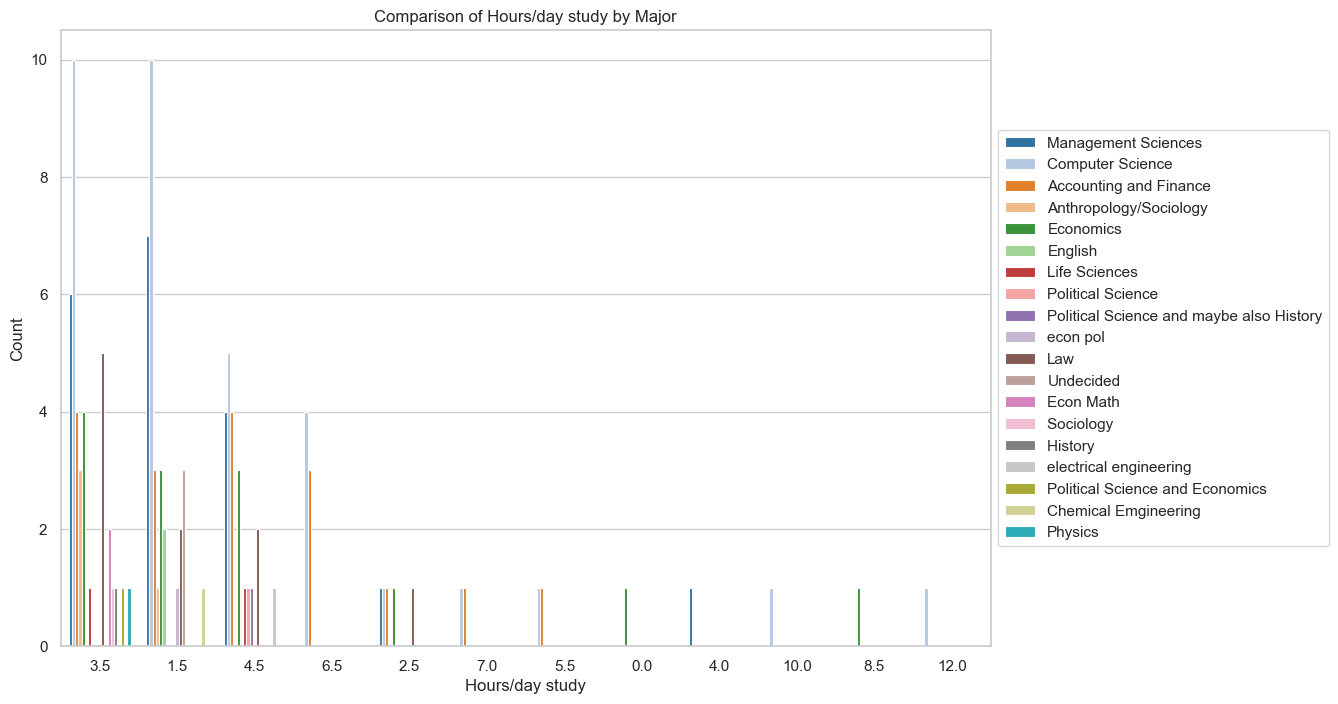

In [1064]:
sns.set(style="whitegrid")

color_palette = sns.color_palette("tab20", n_colors=len(Our_data['Major'].unique()))

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Hours/day study', hue='Major', data=Our_data, order=Our_data['Hours/day study'].value_counts().index, palette=color_palette, linewidth=0.8)

plt.xlabel('Hours/day study')
plt.ylabel('Count')
plt.title('Comparison of Hours/day study by Major')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [1065]:
# This shows people across different schools and majors with the number of hours they study per day,
# The highest scoring major is the Computer Science major (Grey colored) which can be found in all the hour distributions 
# from 3-4 hours to 10-14 even
# along with Managament Sciences major (Dark Blue), which extends to even 4-5 hours

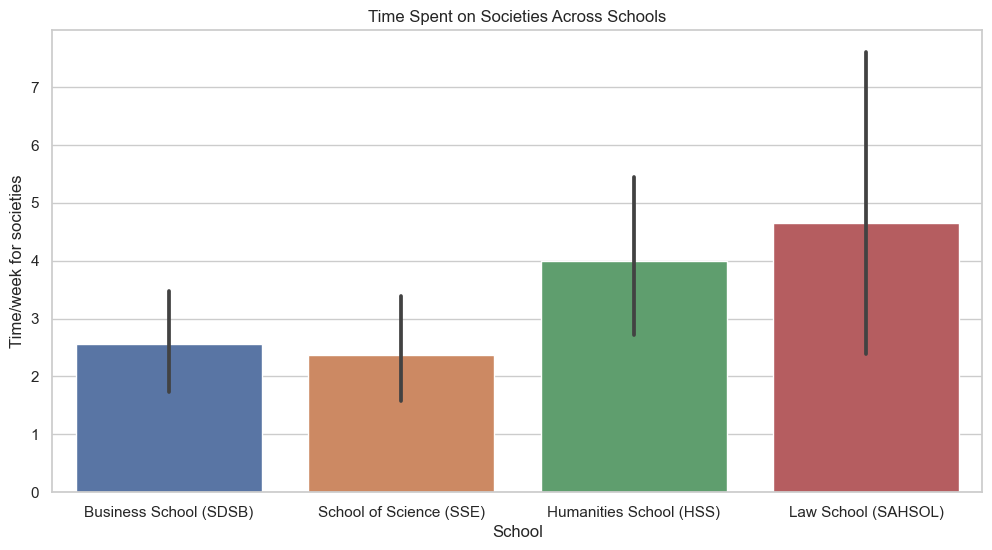

In [1066]:
plt.figure(figsize=(12, 6))

sns.barplot(x='School', y='Time/week for societies', data=Our_data)

plt.title('Time Spent on Societies Across Schools')
plt.show()


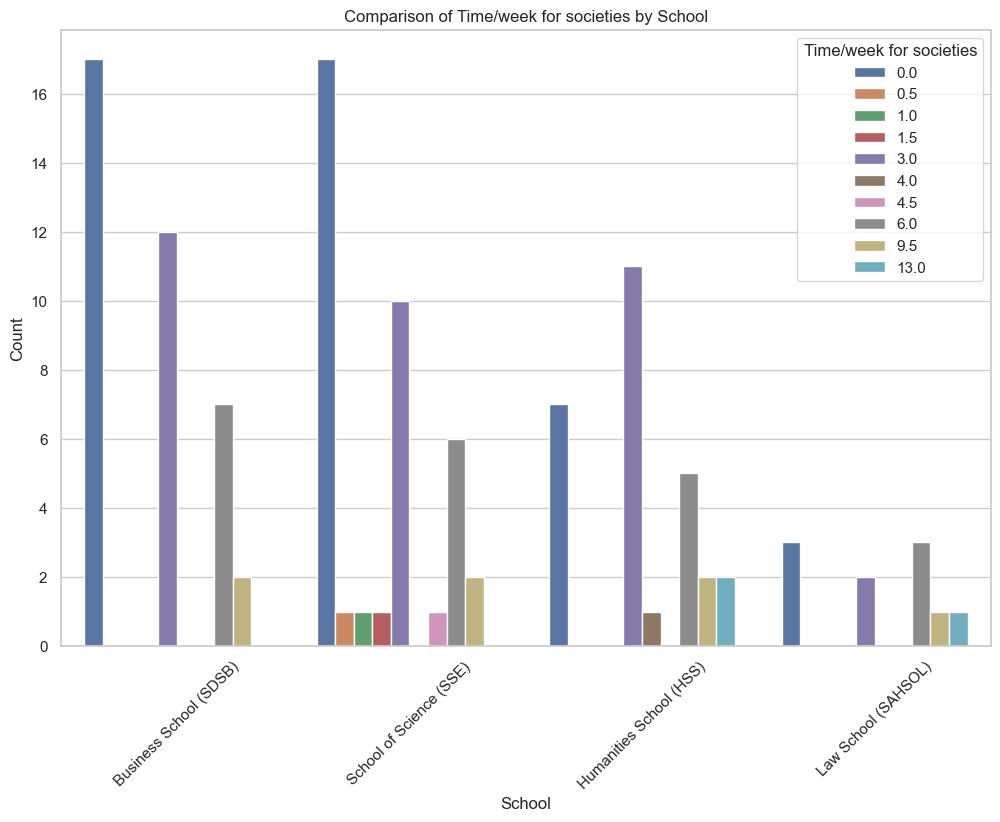

In [1067]:
plt.figure(figsize=(12, 8))
sns.countplot(x='School', hue='Time/week for societies', data=Our_data)

plt.title('Comparison of Time/week for societies by School')
plt.xlabel('School')
plt.ylabel('Count')
plt.xticks(rotation=45)


plt.show()

# Research Question 2: How do the priorities of students from different schools vary, e.g., which kinds of extracurriculars are students willing to sacrifice to academic workload?

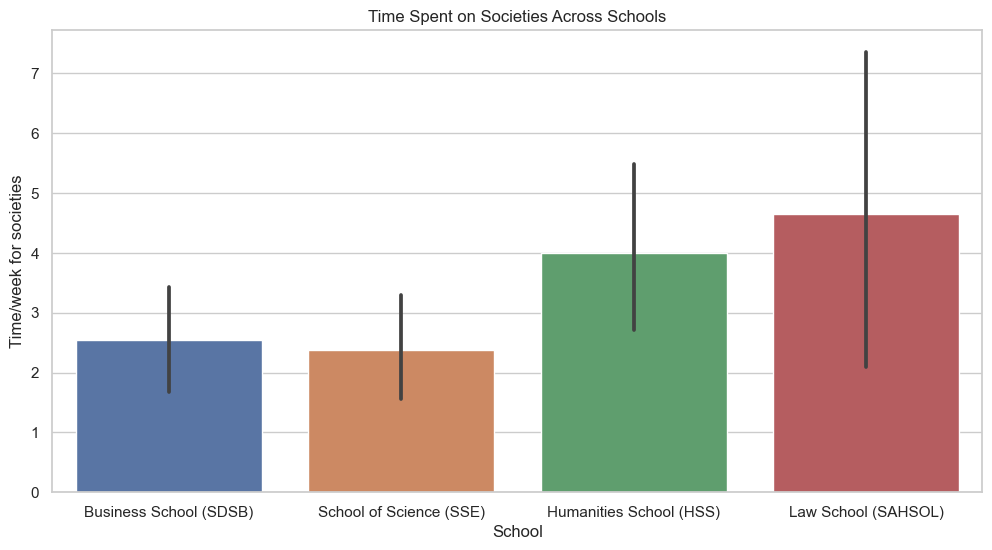

In [1068]:
plt.figure(figsize=(12, 6))

sns.barplot(x='School', y='Time/week for societies', data=Our_data)

plt.title('Time Spent on Societies Across Schools')
plt.show()

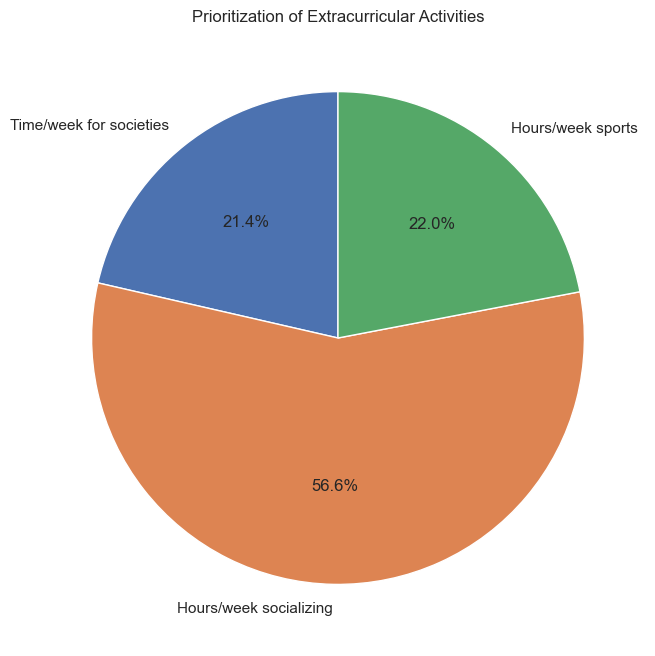

In [1069]:
priorities = Our_data[['Time/week for societies', 'Hours/week socializing', 'Hours/week sports']].sum()

plt.figure(figsize=(8, 8))

plt.pie(priorities, labels=priorities.index, autopct='%1.1f%%', startangle=90)
plt.title('Prioritization of Extracurricular Activities')

plt.show()

# Research Question 3: What is the effect of academic workload and socialization on the likelihood of a student seeking counseling?

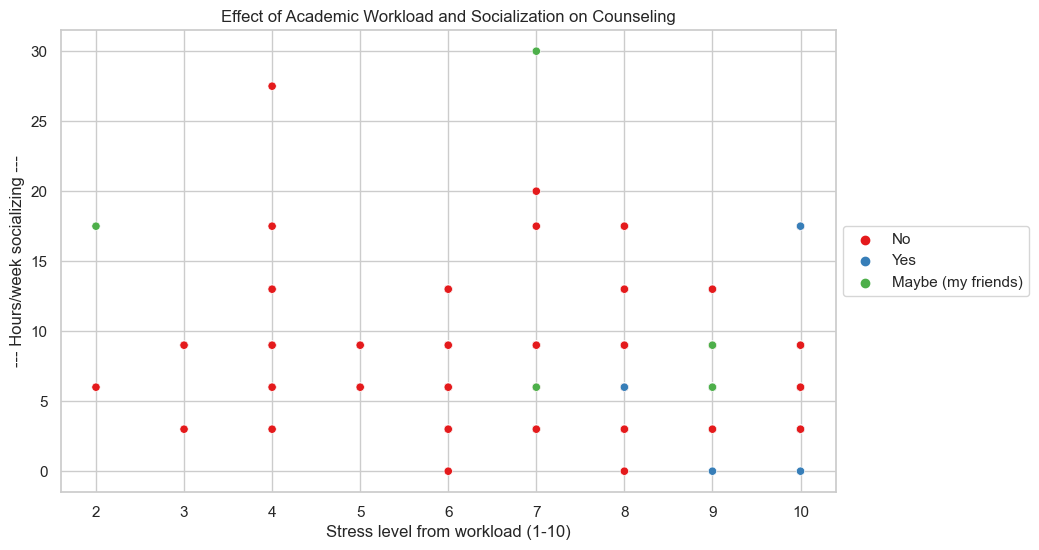

In [1070]:
plt.figure(figsize=(10, 6))

ax = sns.scatterplot(x='Stress level from workload (1-10)', y='Hours/week socializing', hue='Counseling on campus', data=Our_data, palette='Set1')

plt.title('Effect of Academic Workload and Socialization on Counseling')
plt.xlabel('Stress level from workload (1-10)')
plt.ylabel('--- Hours/week socializing ---')
plt.legend(title='Counseling on campus')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

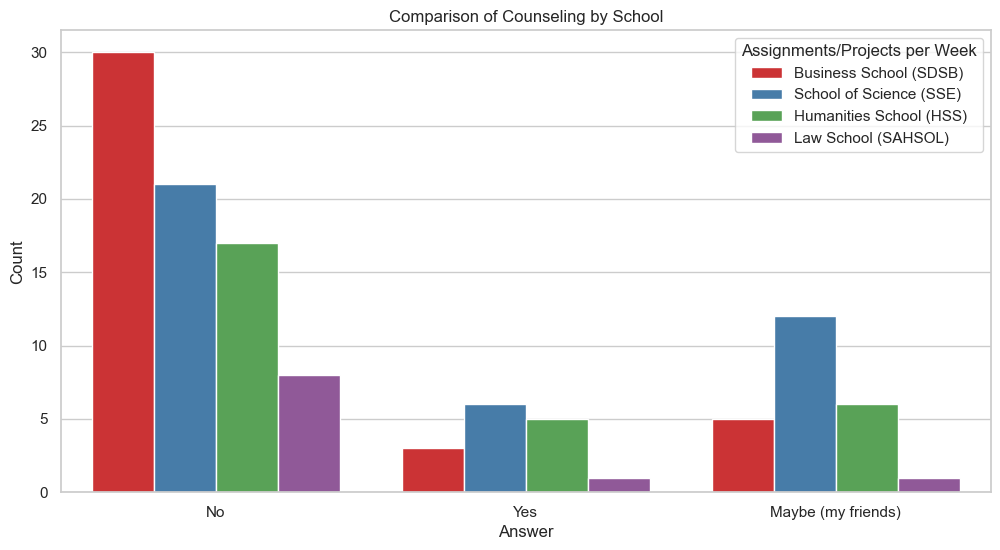

In [1071]:
counsel_column = 'Counseling on campus'
school_column = 'School'

color_palette = sns.color_palette("Set1")

plt.figure(figsize=(12, 6))
sns.countplot(x=counsel_column, hue=school_column, data=Our_data, palette=color_palette)

plt.title('Comparison of Counseling by School')
plt.xlabel('Answer')
plt.ylabel('Count')
plt.legend(title='Assignments/Projects per Week', loc='upper right')

plt.show()

In [1072]:
# This shows that students in SSE are reluctant to get any help even though visually above, they have more workload.

# The most reluctant to go to Counselling are the SDSB students - Red (Which according to workload and hours/day study 
# have a fairly comparable competition, this could lead to a new perspective)

# Next up are SSE students (Blue), Which have the most workload to studying ratio and yet they only a few seem to route their
# problems through direct seeking of help

# Potential Research Question: Time Management Across Years

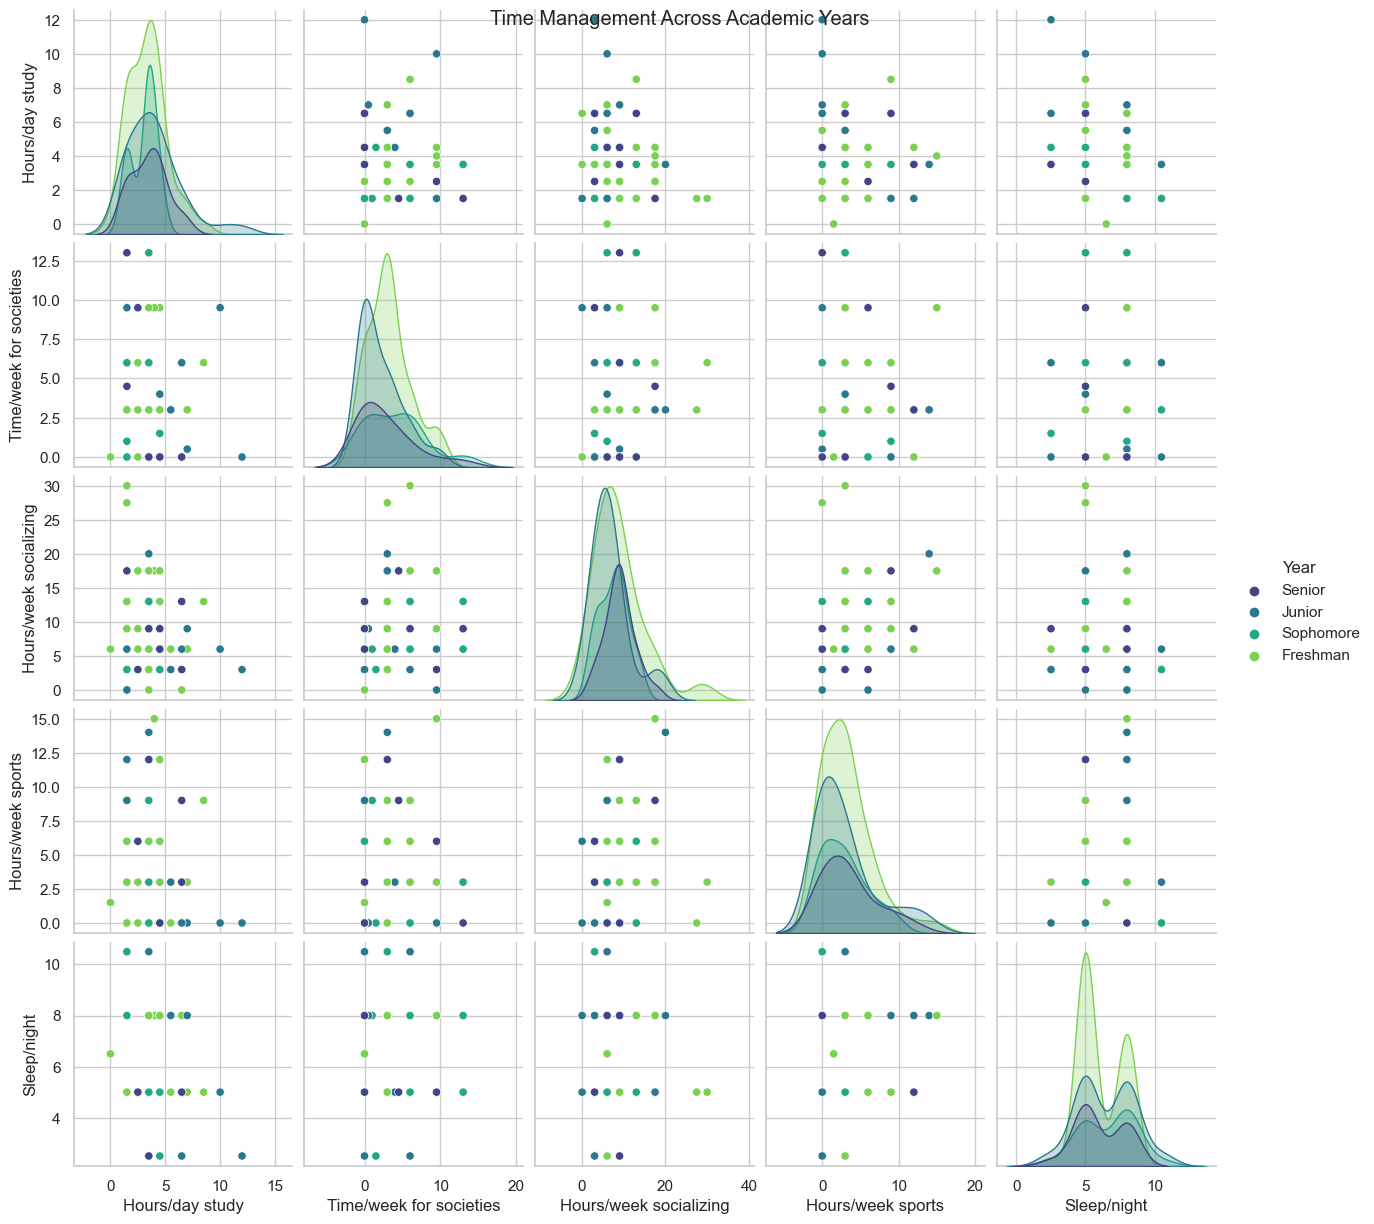

In [1073]:
time_management_cols = ['Hours/day study', 'Time/week for societies', 'Hours/week socializing', 'Hours/week sports', 'Sleep/night']
sns.pairplot(Our_data, vars=time_management_cols, hue='Year', palette='viridis')
plt.suptitle('Time Management Across Academic Years')
plt.show()

# Potential Research Question: Stress Levels Across Schools and Majors:



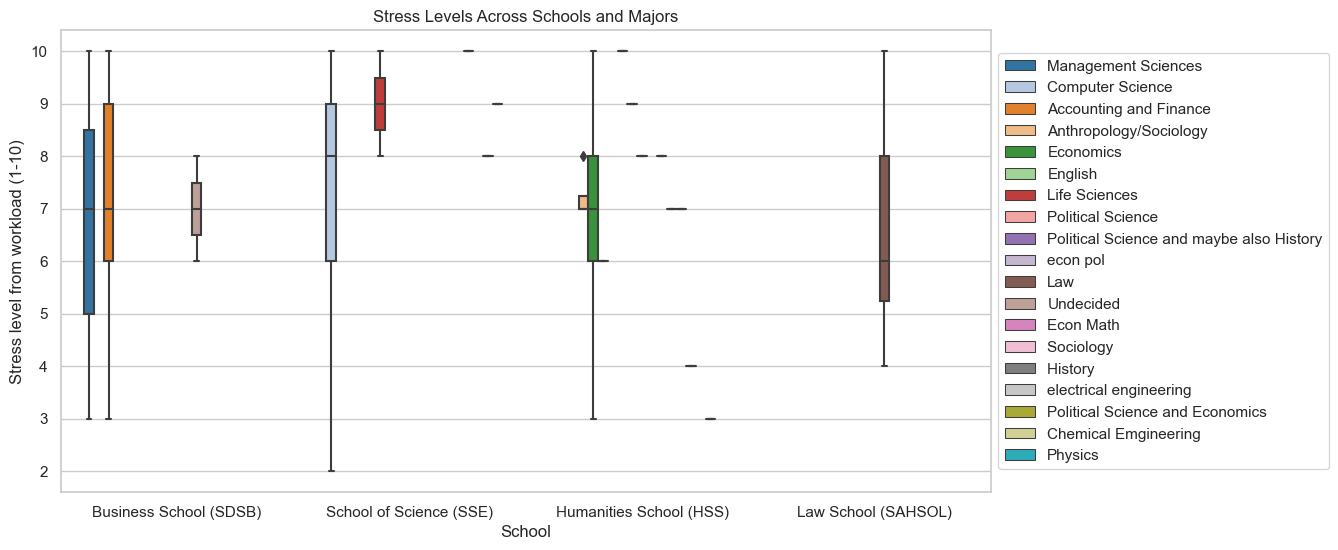

In [1074]:
plt.figure(figsize=(12, 6))

color_palette = sns.color_palette("tab20")

ax = sns.boxplot(x='School', y='Stress level from workload (1-10)', hue='Major', data=Our_data, palette=color_palette)

plt.title('Stress Levels Across Schools and Majors')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# Extra Visualization for better understand Code

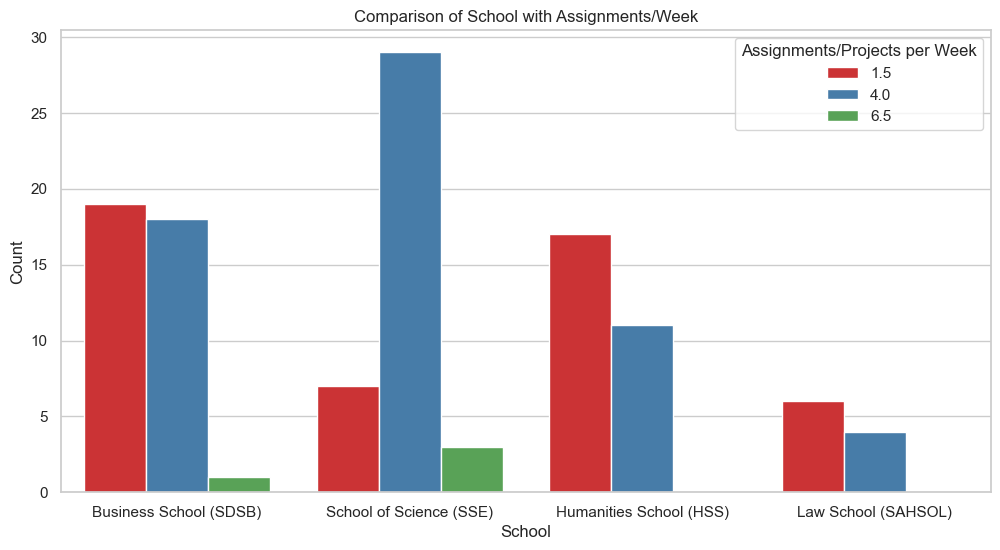

In [1076]:
school_column = 'School'
assignments_column = 'Assignments/Week'

color_palette = sns.color_palette("Set1")

plt.figure(figsize=(12, 6))
sns.countplot(x = school_column, hue = assignments_column, data = Our_data, palette=color_palette)


plt.title('Comparison of School with Assignments/Week')
plt.xlabel('School')
plt.ylabel('Count')
plt.legend(title='Assignments/Projects per Week', loc='upper right')

plt.show()

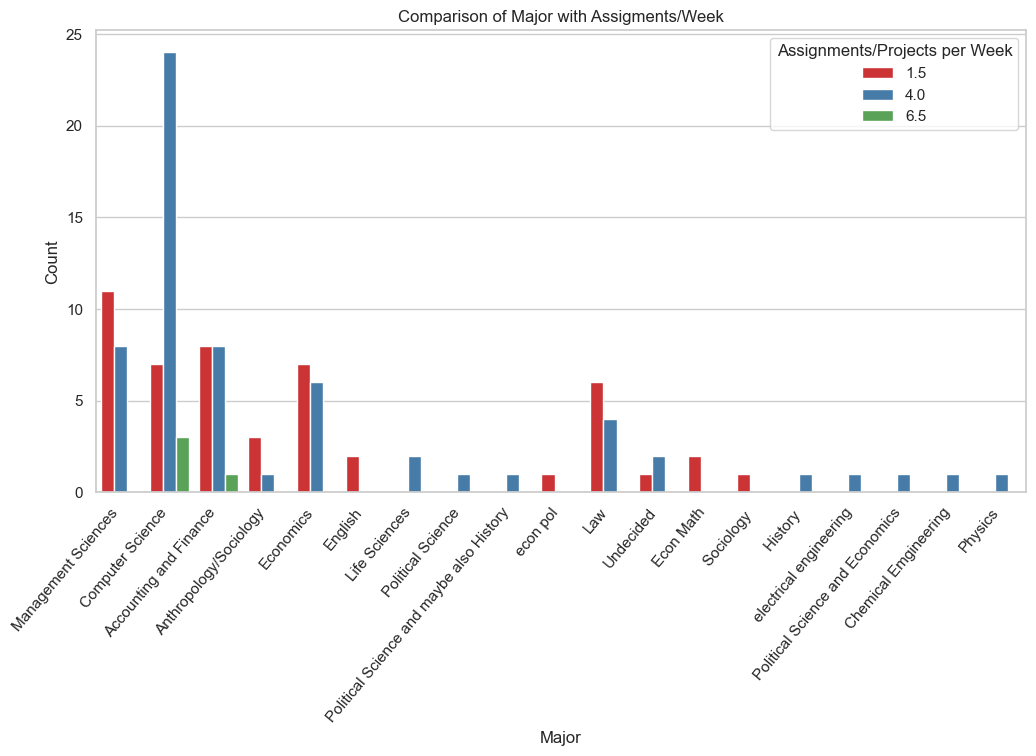

In [1078]:
Major_column = 'Major'
assignments_column = 'Assignments/Week'

color_palette = sns.color_palette("Set1")

plt.figure(figsize=(12, 6))
sns.countplot(x = Major_column, hue = assignments_column, data = Our_data, palette=color_palette)


plt.title('Comparison of Major with Assigments/Week')
plt.xlabel('Major')
plt.ylabel('Count')
plt.legend(title='Assignments/Projects per Week', loc='upper right')

plt.xticks(rotation=50, ha='right')

plt.show()

# Modelling Research Question 1

In [1080]:
cols = ['School', 'Year','Major', 'Hours/day study']
df1 = Our_data[cols]
df = pd.get_dummies(df1, columns=['School', 'Year', 'Major'])
np.random.seed(0)
train_proportion = 0.7
size = int(train_proportion * len(df))
index = np.random.permutation(df.index)
df_shuffled = df.loc[index]

train_df = df_shuffled.iloc[:size]
test_df = df_shuffled.iloc[size:]

train_X = train_df.drop('Hours/day study', axis=1)
train_y = train_df['Hours/day study']
test_X = test_df.drop('Hours/day study', axis=1)
test_y = test_df['Hours/day study']

train_X_const = sm.add_constant(train_X)
model = sm.OLS(train_y, train_X_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Hours/day study   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.9601
Date:                Tue, 05 Dec 2023   Prob (F-statistic):              0.512
Time:                        21:08:44   Log-Likelihood:                -146.44
No. Observations:                  80   AIC:                             328.9
Df Residuals:                      62   BIC:                             371.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.9237      0.260      7.400      0.000       1.404       2.443
School_Business School (SDSB)                      0.2381      1.442      0.165      0.869      -2.645       3.121
School_Humanities School (HSS)                     0.2381      1.035      0.230      0.819      -1.832       2.308
School_Law School (SAHSOL)                         0.4624      0.322      1.434      0.157      -0.182       1.107
School_School of Science (SSE)                     0.9851      0.516      1.908      0.061      -0.047       2.017
Year_Freshman                                      0.4802      0.327      1.469      0.147      -0.173       1.134
Year_Junior                                        0.2609      0.404      0.645      0.521      -0.548       1.069
Year_Senior                                        0.9863      0.454      2.173      0.034       0.079       1.894
Year_Sophomore                                     0.1963      0.432      0.454      0.651      -0.667       1.060
Major_Accounting and Finance                       1.8792      1.717      1.094      0.278      -1.554       5.312
Major_Anthropology/Sociology                      -0.1461      1.290     -0.113      0.910      -2.724       2.432
Major_Chemical Emgineering                        -2.3950      1.589     -1.507      0.137      -5.571       0.781
Major_Computer Science                             0.3243      0.683      0.475      0.637      -1.042       1.690
Major_Econ Math                                 2.844e-16   3.28e-16      0.867      0.389   -3.71e-16     9.4e-16
Major_Economics                                    0.7454      0.997      0.748      0.457      -1.247       2.738
Major_English                                     -0.9226      1.796     -0.514      0.609      -4.513       2.667
Major_History                                      0.8580      1.777      0.483      0.631      -2.693       4.409
Major_Law                                          0.4624      0.322      1.434      0.157      -0.182       1.107
Major_Life Sciences                                1.3304      1.538      0.865      0.390      -1.743       4.404
Major_Management Sciences                          0.1270      1.713      0.074      0.941      -3.298       3.552
Major_Physics                                      0.3304      1.538      0.215      0.831      -2.743       3.404
Major_Political Science                                 0          0        nan        nan           0           0
Major_Political Science and Economics                   0          0        nan        nan           0           0
Major_Political Science and maybe also History          0          0        nan        nan   

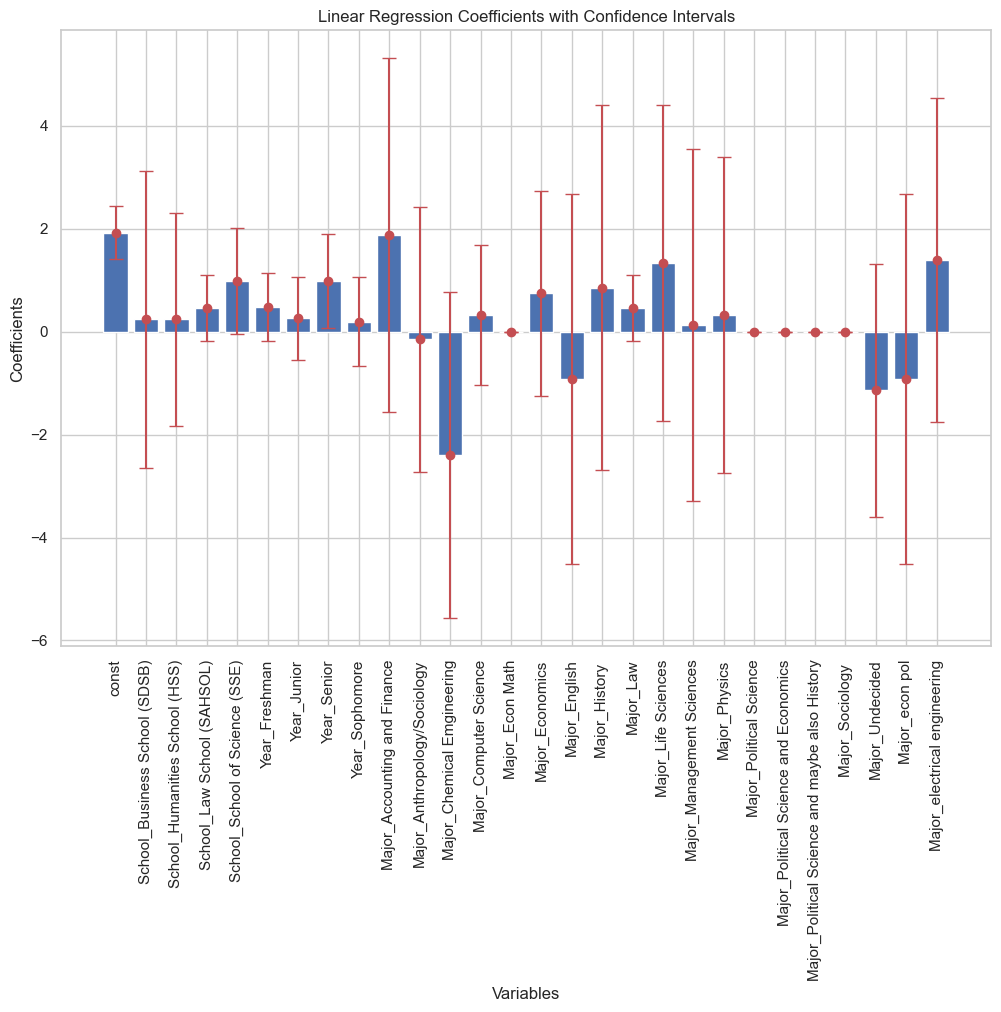

In [1081]:
coef_plot = model.params
conf_int = model.conf_int()

plt.figure(figsize=(12,8))
plt.bar(coef_plot.index, coef_plot)
plt.errorbar(coef_plot.index, coef_plot, yerr=[coef_plot - conf_int.iloc[:, 0], conf_int.iloc[:, 1] - coef_plot], fmt='o', color='r', capsize=5)
plt.title('Linear Regression Coefficients with Confidence Intervals')
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.xticks(rotation=90)
plt.show()

In [1082]:
predicted_test_y = model.predict(train_X_const)
def RMSE(test_y, predicted_test_y):
    return np.sqrt(np.mean((test_y - predicted_test_y) ** 2))
test_X_const = sm.add_constant(test_X)
predicted_test_y = model.predict(test_X_const)
rmse = RMSE(test_y, predicted_test_y)
rmse

2.3330832272490176

In [1083]:
cols = ['School', 'Year','Major', 'Hours/week socializing']
df1 = Our_data[cols]
df = pd.get_dummies(df1, columns=['School', 'Year', 'Major'])
np.random.seed(0)
train_proportion = 0.7
size = int(train_proportion * len(df))
index = np.random.permutation(df.index)
df_shuffled = df.loc[index]

train_df = df_shuffled.iloc[:size]
test_df = df_shuffled.iloc[size:]

train_X = train_df.drop('Hours/week socializing', axis=1)
train_y = train_df['Hours/week socializing']
test_X = test_df.drop('Hours/week socializing', axis=1)
test_y = test_df['Hours/week socializing']

train_X_const = sm.add_constant(train_X)
model = sm.OLS(train_y, train_X_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Hours/week socializing   R-squared:                       0.224
Model:                                OLS   Adj. R-squared:                  0.012
Method:                     Least Squares   F-statistic:                     1.055
Date:                    Tue, 05 Dec 2023   Prob (F-statistic):              0.416
Time:                            21:08:45   Log-Likelihood:                -225.46
No. Observations:                      80   AIC:                             486.9
Df Residuals:                          62   BIC:                             529.8
Df Model:                              17                                         
Covariance Type:                nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              4.2144      0.698      6.037      0.000       2.819       5.610
School_Business School (SDSB)                     -5.0050      3.873     -1.292      0.201     -12.746       2.736
School_Humanities School (HSS)                     4.9950      2.780      1.796      0.077      -0.563      10.553
School_Law School (SAHSOL)                         1.1553      0.866      1.334      0.187      -0.576       2.886
School_School of Science (SSE)                     3.0691      1.386      2.214      0.030       0.299       5.840
Year_Freshman                                      2.6040      0.878      2.966      0.004       0.849       4.359
Year_Junior                                       -1.1456      1.086     -1.055      0.296      -3.316       1.025
Year_Senior                                        2.0121      1.219      1.651      0.104      -0.424       4.448
Year_Sophomore                                     0.7439      1.160      0.641      0.524      -1.575       3.063
Major_Accounting and Finance                       5.1599      4.611      1.119      0.267      -4.058      14.377
Major_Anthropology/Sociology                      -3.4189      3.463     -0.987      0.327     -10.342       3.504
Major_Chemical Emgineering                         3.7044      4.267      0.868      0.389      -4.824      12.233
Major_Computer Science                             0.6680      1.835      0.364      0.717      -3.000       4.336
Major_Econ Math                                 -6.09e-16    8.8e-16     -0.692      0.492   -2.37e-15    1.15e-15
Major_Economics                                   -0.8933      2.677     -0.334      0.740      -6.245       4.458
Major_English                                      0.9361      4.823      0.194      0.847      -8.704      10.576
Major_History                                     -8.8135      4.771     -1.847      0.069     -18.350       0.723
Major_Law                                          1.1553      0.866      1.334      0.187      -0.576       2.886
Major_Life Sciences                               -3.1380      4.129     -0.760      0.450     -11.392       5.116
Major_Management Sciences                          7.8970      4.600      1.717      0.091      -1.299      17.093
Major_Physics                                      6.8620      4.129      1.662      0.102      -1.392      15.116
Major_Political Science                                 0          0        nan        nan           0           0
Major_Political Science and Economics                   0          0        nan        nan           0           0
Major_Political Science and maybe also History   

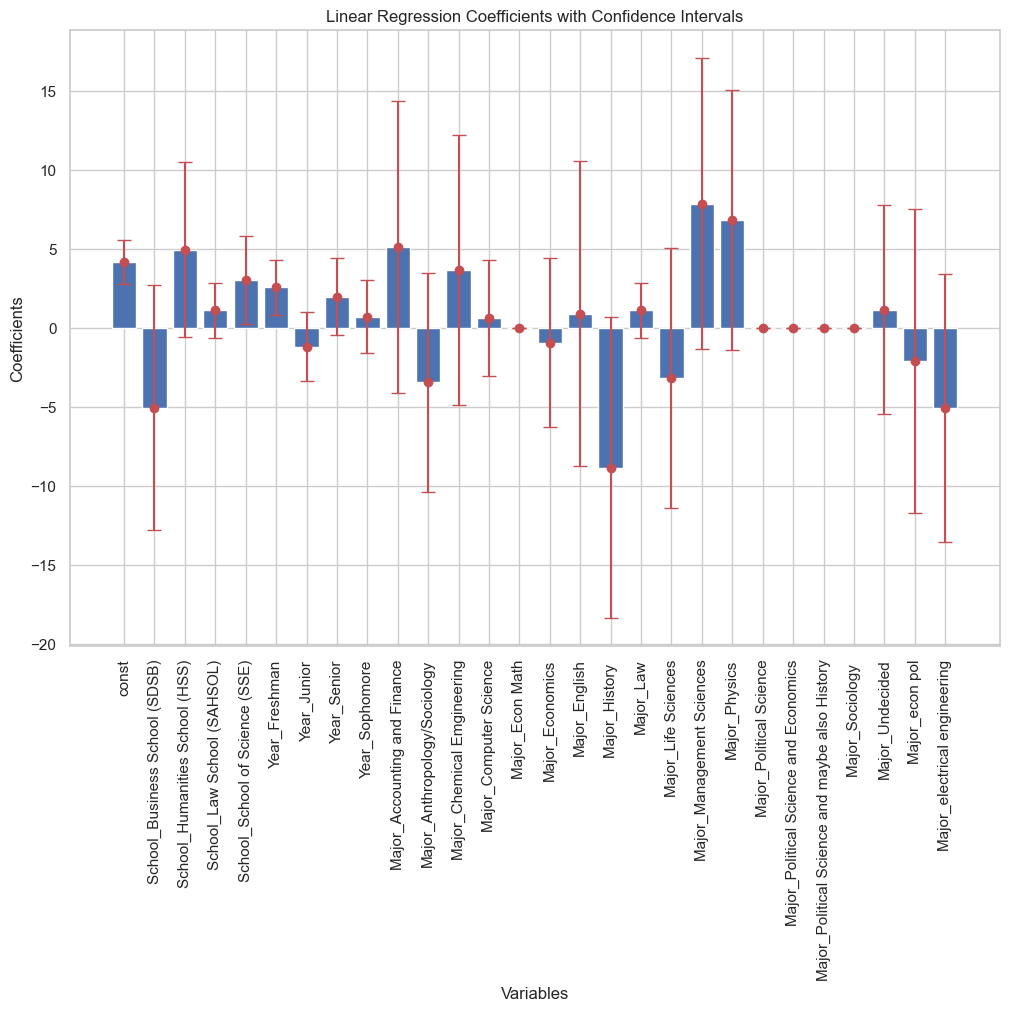

In [1084]:
coef_plot = model.params
conf_int = model.conf_int()

plt.figure(figsize=(12,8))
plt.bar(coef_plot.index, coef_plot)
plt.errorbar(coef_plot.index, coef_plot, yerr=[coef_plot - conf_int.iloc[:, 0], conf_int.iloc[:, 1] - coef_plot], fmt='o', color='r', capsize=5)
plt.title('Linear Regression Coefficients with Confidence Intervals')
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.xticks(rotation=90)
plt.show()

In [1085]:
predicted_test_y = model.predict(train_X_const)
def RMSE(test_y, predicted_test_y):
    return np.sqrt(np.mean((test_y - predicted_test_y) ** 2))
test_X_const = sm.add_constant(test_X)
predicted_test_y = model.predict(test_X_const)
rmse = RMSE(test_y, predicted_test_y)
rmse

6.281923755278512

# Modelling Research Question 2

In [1086]:
cols = ['Hours/day study','Counseling on campus']
df1 = Our_data[cols]
#df = pd.get_dummies(df1, columns=['Major'])
np.random.seed(0)
train_proportion = 0.7
size = int(train_proportion * len(df1))
index = np.random.permutation(df1.index)
df_shuffled = df1.loc[index]

train_df = df_shuffled.iloc[:size]
test_df = df_shuffled.iloc[size:]

train_X = train_df.drop('Counseling on campus', axis=1)
train_y = train_df['Counseling on campus']
test_X = test_df.drop('Counseling on campus', axis=1)
test_y = test_df['Counseling on campus']

train_y = pd.get_dummies(train_y)
train_X_const = sm.add_constant(train_X)
model = sm.MNLogit(train_y, train_X_const).fit()
display(model.summary())
test_X_const = sm.add_constant(test_X)
predicted_probs = model.predict(test_X_const)
predicted_categories = predicted_probs.idxmax(axis=1)
label_encoder = LabelEncoder()
test_y_numeric = label_encoder.fit_transform(test_y)

accuracy = accuracy_score(test_y_numeric, predicted_categories)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(test_y_numeric, predicted_categories)
#print("Confusion Matrix:")
#print(conf_matrix)

Optimization terminated successfully.
         Current function value: 0.869769
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                   80
Model:                        MNLogit   Df Residuals:                       76
Method:                           MLE   Df Model:                            2
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                0.003779
Time:                        21:08:46   Log-Likelihood:                -69.582
converged:                       True   LL-Null:                       -69.846
Covariance Type:            nonrobust   LLR p-value:                    0.7680
===================================================================================
           y=No       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.9195      0.661      1.391      0.164      -0.376       2.215
Hours/day study     0.1257      0.185      0.678      0.498      -0.237       0.489
-----------------------------------------------------------------------------------
          y=Yes       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5419      0.859     -0.631      0.528      -2.226       1.142
Hours/day study     0.1418      0.232      0.610      0.542      -0.314       0.597
===================================================================================
"""

Accuracy: 0.6571428571428571
